In [16]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [4]:
# Load in the WRF out file.
out_fp = (r'/Users/alexyoung/Desktop/Cornell/Classes/Spring_2021/EAS_5555-Numerical_Climate_Modeling/'
          'WRF_Tutorial_Run/Hurricane_Matthew/wrfout_d01_2016-10-06_00:00:00')
ds = Dataset(out_fp)

In [5]:
# Display the contents of the file.
print('DIMENSIONS')
for name, dim in ds.dimensions.items():
     print(name, dim)
print('\n')
print('VARIABLES')
print(ds.variables)

DIMENSIONS
Time <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'Time', size = 17
DateStrLen <class 'netCDF4._netCDF4.Dimension'>: name = 'DateStrLen', size = 19
west_east <class 'netCDF4._netCDF4.Dimension'>: name = 'west_east', size = 90
south_north <class 'netCDF4._netCDF4.Dimension'>: name = 'south_north', size = 99
bottom_top <class 'netCDF4._netCDF4.Dimension'>: name = 'bottom_top', size = 34
bottom_top_stag <class 'netCDF4._netCDF4.Dimension'>: name = 'bottom_top_stag', size = 35
soil_layers_stag <class 'netCDF4._netCDF4.Dimension'>: name = 'soil_layers_stag', size = 4
west_east_stag <class 'netCDF4._netCDF4.Dimension'>: name = 'west_east_stag', size = 91
south_north_stag <class 'netCDF4._netCDF4.Dimension'>: name = 'south_north_stag', size = 100


VARIABLES
{'Times': <class 'netCDF4._netCDF4.Variable'>
|S1 Times(Time, DateStrLen)
unlimited dimensions: Time
current shape = (17, 19)
filling on, default _FillValue of   used, 'XLAT': <class 'netCDF4._netCDF4.Variable'>
flo

(17, 99, 90)
[[-0.8212759  -0.99402934 -1.16246    ... -6.880556   -6.8814726
  -6.7814026 ]
 [-1.5606039  -1.3250986  -1.2069172  ... -6.078805   -6.0343733
  -5.7688103 ]
 [-1.8178289  -1.442728   -1.8417292  ... -4.9248476  -4.8203797
  -4.6114335 ]
 ...
 [-1.4730455  -1.6870874  -2.050437   ... -5.112341   -5.169439
  -5.111125  ]
 [-1.6446989  -1.9140223  -2.0703795  ... -4.775773   -4.8213634
  -4.7943635 ]
 [-1.4593377  -1.7612209  -1.9595398  ... -4.2870355  -4.296773
  -4.3427687 ]]


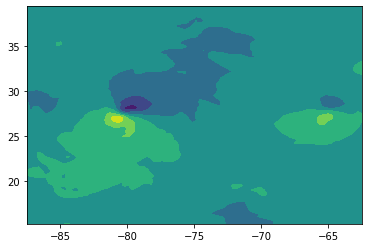

In [15]:
# Plot a variable.
var_name = 'U10'
var_data = ds.variables[var_name][:]

print(var_data.shape)

lats = ds.variables['XLAT'][0,:,:]
lons = ds.variables['XLONG'][0,:,:]

# Time slice to plot.
t = 10
slice_data = var_data[t, :, :]
print(slice_data)
plt.contourf(lons, lats, slice_data)
plt.show()

In [37]:
def plot_var(var_name, time=0, height=None):
    "Makes a plot of the wrfout data based on the variable name provided."
    # Handle projections.
    proj = ccrs.LambertConformal(central_longitude=-89.46, central_latitude=42.49, standard_parallels=(30,60), cutoff=10)
    dataproj = ccrs.PlateCarree()
    
    # Instantiate the plot.
    fig = plt.figure(figsize = (12,8), dpi = 300)
    ax = plt.subplot(111, projection = proj)
    
    # Get the data from the variable and the lat and lon.
    lat = ds.variables['XLAT'][0, :, :]
    lon = ds.variables['XLONG'][0, :, :]
    var_data = ds.variables[var_name][:]
    
    # Set geographical extent and plot boundaries.
    ax.set_extent([np.min(lon), np.max(lon), np.min(lat), np.max(lat)]) #CONUS
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), edgecolor = 'black', linewidth=.6)
    ax.add_feature(cfeature.LAKES.with_scale('50m'), edgecolor = 'black', facecolor = 'none', linewidth=.2)
#     ax.add_feature(states, linewidth=.4, edgecolor='black') 
    
    # Add the specified variable.
    var_contour = plt.contourf(lon, lat, var_data[time,:,:], extend = 'both', transform = dataproj)
    cbar = plt.colorbar(var_contour, orientation = 'vertical', pad = 0.00)
    cbar.set_label(f'{var_name}')
    ax.set_aspect('auto')
    #print(str(int(T2[time][100,100])))
    #for x,y in zip(xs,ys):
    #    #label = '{i}'.format(T2[time][x,y])
    #    plt.annotate(str(T2[time][x,y].values), (x,y), ha = 'center')
#     plot_values(lon, lat, T2[time], nsize=15, color='k', ax=ax, transform=dataproj)
#     plt.suptitle(u'2 Meter Temperature (\N{DEGREE SIGN}F)', fontsize = 16)
#     plt.title('Valid: ' + tim + ' Z', fontsize = 12, loc = 'left')
#     plt.title('Initialized: ' + init + ' Z', fontsize = 12, loc = 'right')
#     plt.savefig('t2_amd_' + init + '_' + str(time) + '.png')
#     plt.clf()
    
    plt.show()
    
    return ax

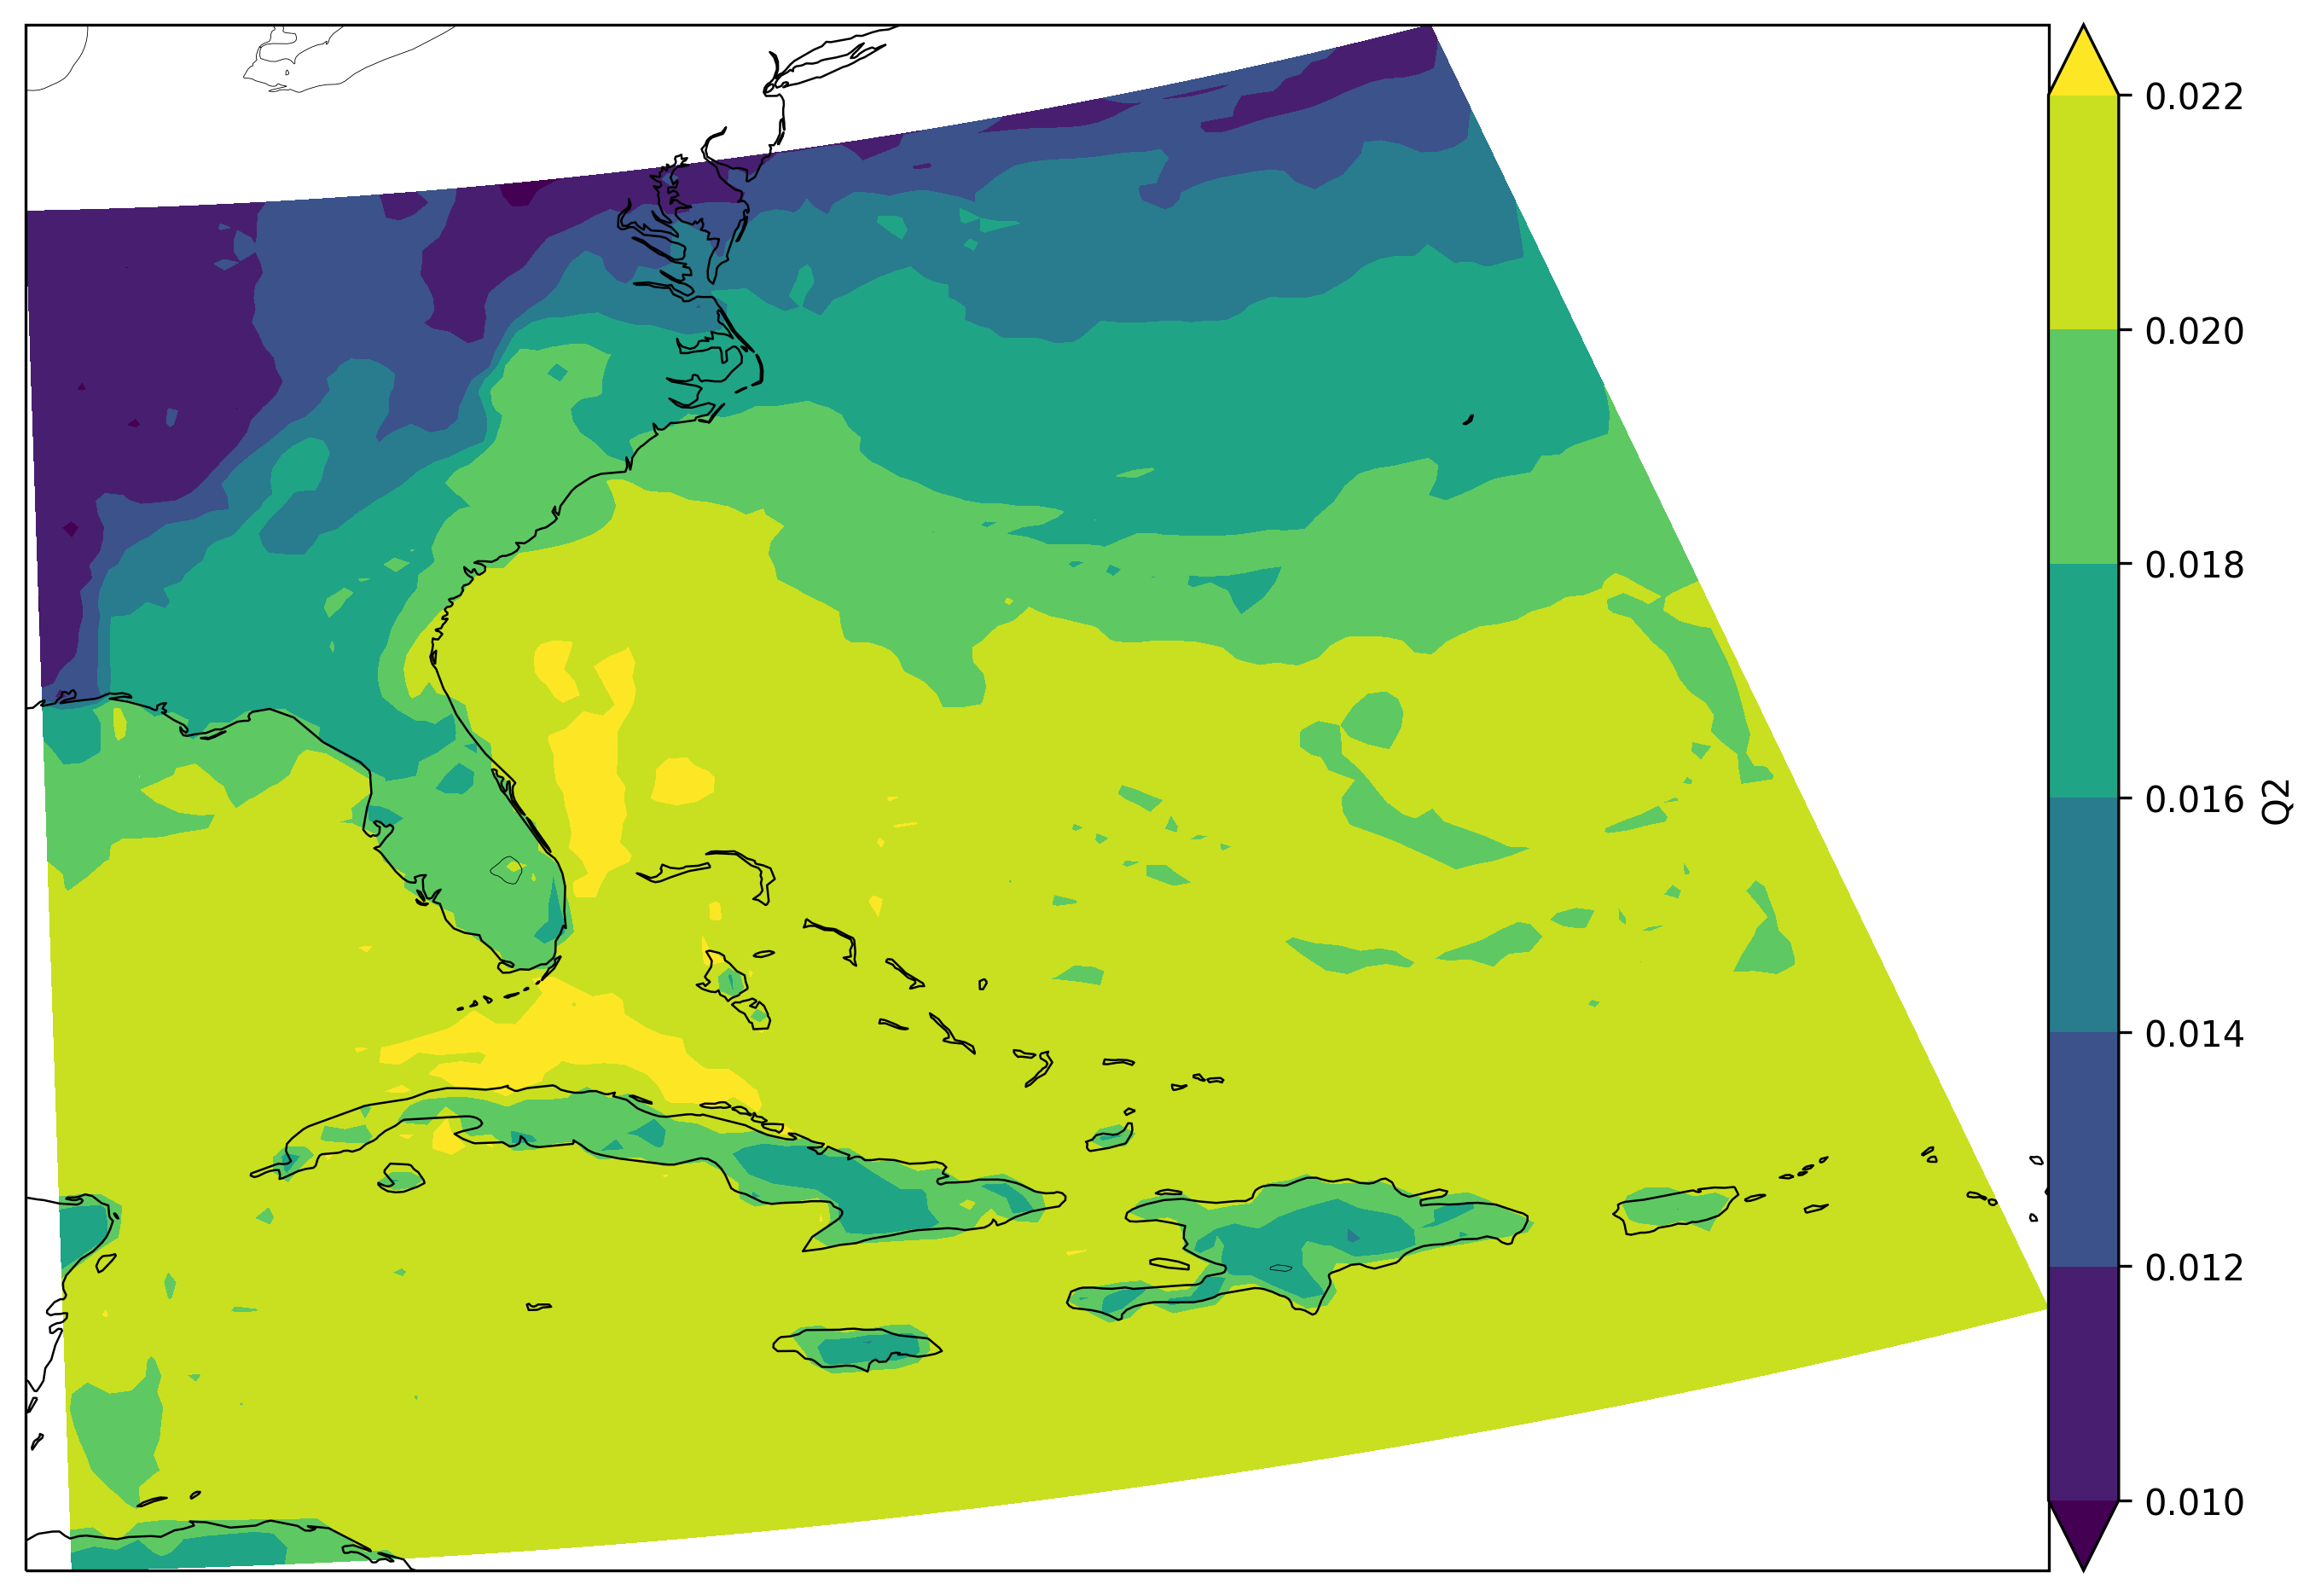

<GeoAxesSubplot:>

In [42]:
plot_var('Q2', 15)

In [9]:
root = '/Users/alexyoung/Desktop/Cornell/Classes/Spring_2021/EAS_5555-Numerical_Climate_Modeling/WRF_Tutorial_Run/January_2000/'
output = 'wrfout_d01_2000-01-24_12:00:00.nc'
data = xr.open_dataset(root + output)
# data.info()

xarray.Dataset {
dimensions:
	Time = 5 ;
	bottom_top = 32 ;
	bottom_top_stag = 33 ;
	soil_layers_stag = 4 ;
	south_north = 60 ;
	south_north_stag = 61 ;
	west_east = 73 ;
	west_east_stag = 74 ;

variables:
	|S19 Times(Time) ;
	float32 XLAT(Time, south_north, west_east) ;
		XLAT:FieldType = 104 ;
		XLAT:MemoryOrder = XY  ;
		XLAT:description = LATITUDE, SOUTH IS NEGATIVE ;
		XLAT:units = degree_north ;
		XLAT:stagger =  ;
	float32 XLONG(Time, south_north, west_east) ;
		XLONG:FieldType = 104 ;
		XLONG:MemoryOrder = XY  ;
		XLONG:description = LONGITUDE, WEST IS NEGATIVE ;
		XLONG:units = degree_east ;
		XLONG:stagger =  ;
	float32 LU_INDEX(Time, south_north, west_east) ;
		LU_INDEX:FieldType = 104 ;
		LU_INDEX:MemoryOrder = XY  ;
		LU_INDEX:description = LAND USE CATEGORY ;
		LU_INDEX:units =  ;
		LU_INDEX:stagger =  ;
	float32 ZNU(Time, bottom_top) ;
		ZNU:FieldType = 104 ;
		ZNU:MemoryOrder = Z   ;
		ZNU:description = eta values on half (mass) levels ;
		ZNU:units =  ;
		ZNU:stagger =

In [6]:
lats = xr.DataArray(data.XLAT)
lat = lats[0].values
lons = xr.DataArray(data.XLONG)
lon = lons[0].values

In [7]:
def plot_T2(T2, time = 0):
    fig = plt.figure(figsize = (12,8), dpi = 300)
    timevals = str(times[time])
    tim = timevals[:-10]
    ax = plt.subplot(111, projection = proj)
    ax.set_extent([-124, -60, 16, 62]) #CONUS
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), edgecolor = 'black', linewidth=.6)
    ax.add_feature(cfeature.LAKES.with_scale('50m'), edgecolor = 'black', facecolor = 'none', linewidth=.2)
    ax.add_feature(states, linewidth=.4, edgecolor='black')
    T2_fconts = plt.contourf(lon, lat, T2[time], cmap = T2cmap, levels = T2levs, extend = 'both', transform = dataproj)
    #T2_mesh = plt.pcolormesh(lon, lat, T2[time], cmap = T2cmap, vmin = -10, vmax = 110, transform = dataproj)
    cbar = plt.colorbar(T2_fconts, orientation = 'vertical', ticks = T2ticks, pad = 0.00)
    cbar.set_label(u'2 Meter Temperature (\N{DEGREE SIGN}F)')
    ax.set_aspect('auto')
    #print(str(int(T2[time][100,100])))
    #for x,y in zip(xs,ys):
    #    #label = '{i}'.format(T2[time][x,y])
    #    plt.annotate(str(T2[time][x,y].values), (x,y), ha = 'center')
    plot_values(lon, lat, T2[time], nsize=15, color='k', ax=ax, transform=dataproj)
    plt.suptitle(u'2 Meter Temperature (\N{DEGREE SIGN}F)', fontsize = 16)
    plt.title('Valid: ' + tim + ' Z', fontsize = 12, loc = 'left')
    plt.title('Initialized: ' + init + ' Z', fontsize = 12, loc = 'right')
    plt.savefig('t2_amd_' + init + '_' + str(time) + '.png')
    plt.clf()
    return ax

In [8]:
proj = ccrs.LambertConformal(central_longitude=-89.46, central_latitude=42.49, standard_parallels=(30,60), cutoff=10)
dataproj = ccrs.PlateCarree()